# Pra Pemrosesan Data

In [1]:
''' 
    Memanggil library pandas untuk membantu memunculkan 5 data paling 
    awal dan 5 data paling akhir serta fungsi describe() untuk melihat
    sekilas statistik dataset yang dimiliki.
'''
import pandas as pd
df = pd.read_csv('ispu_dki_jakarta_co_from_2016_to_2020.csv', index_col='Date', parse_dates=True)
df.describe()

,CO
count,1684.000000
mean,31.128266
std,13.552834
min,0.000000
25%,21.000000
50%,29.000000
75%,39.000000
max,99.000000


In [2]:
df.head(), df.tail()

(              CO
 Date            
 2016-01-01  53.0
 2016-01-02  29.0
 2016-01-03  33.0
 2016-01-04  36.0
 2016-01-05  54.0,
               CO
 Date            
 2020-08-27  10.0
 2020-08-28  15.0
 2020-08-29  12.0
 2020-08-30  15.0
 2020-08-31  13.0)

<AxesSubplot:xlabel='Date'>

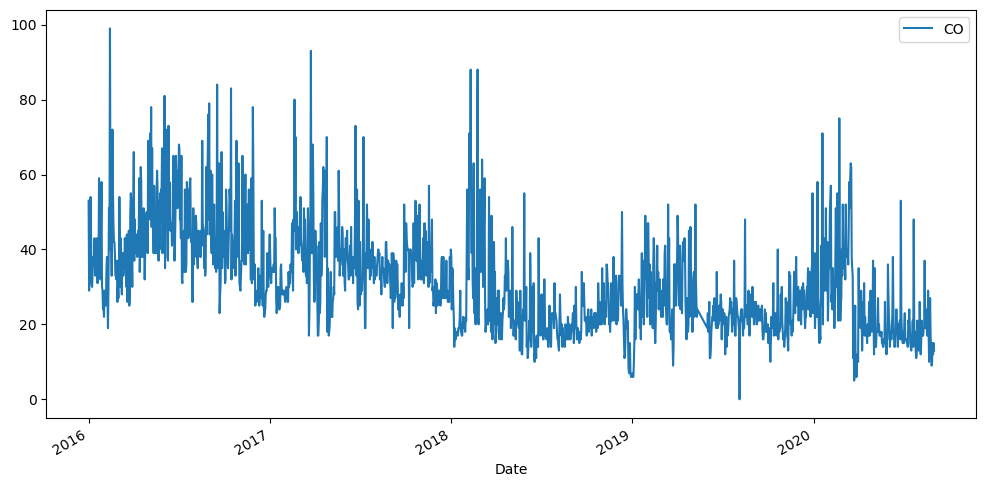

In [3]:
''' 
    Melihat grafik dari dataset dengan library 
    matplotlib.
'''
import matplotlib.pyplot as plt
df.plot(figsize=(12,6))

In [4]:
''' 
    Memeriksa apakah ada missing values atau tidak. Jika ya, 
    maka akan dihandling dengan fungsi dropna() pada data.
'''
df.isna().sum()

CO    1
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.isna().sum()

CO    0
dtype: int64

In [7]:
df.fillna(0)

,CO
Date,
2016-01-01,53.0
2016-01-02,29.0
2016-01-03,33.0
2016-01-04,36.0
2016-01-05,54.0
...,...
2020-08-27,10.0
2020-08-28,15.0
2020-08-29,12.0


In [8]:
df.isna().sum()

CO    0
dtype: int64

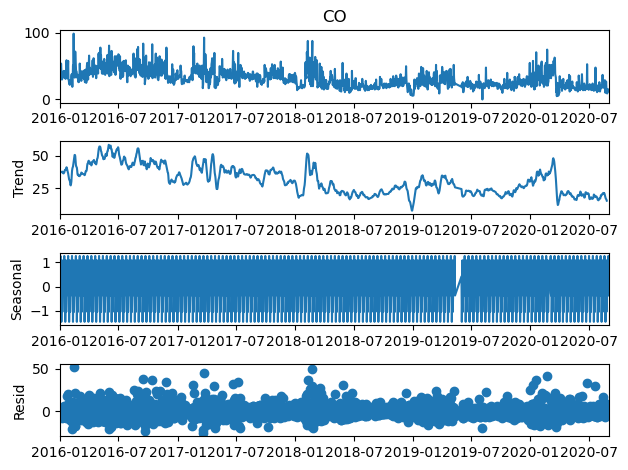

In [9]:
''' 
    Mengimport fungsi seasonal_decompose dari modul
    statsmodels.tsa.seasonal untuk melihat dekomposisi
    musiman pada dataset.
'''
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(df['CO'], model='addtive', period=12)
results.plot();

# Pengolahan Data

In [10]:
''' 
    Membagi training dataset yang dimulai 
    dari 2016-01-01 sampai 2019-12-31 dan testing
    dataset dari 2020-01-01 sampai 2020-12-31.
'''
train = df.iloc[:1441]
test = df.iloc[1441:]

In [11]:
train

,CO
Date,
2016-01-01,53.0
2016-01-02,29.0
2016-01-03,33.0
2016-01-04,36.0
2016-01-05,54.0
...,...
2019-12-27,26.0
2019-12-28,34.0
2019-12-29,36.0


In [12]:
test

,CO
Date,
2020-01-01,25.0
2020-01-02,39.0
2020-01-03,27.0
2020-01-04,19.0
2020-01-05,25.0
...,...
2020-08-27,10.0
2020-08-28,15.0
2020-08-29,12.0


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [14]:
df.head(), df.tail()

(              CO
 Date            
 2016-01-01  53.0
 2016-01-02  29.0
 2016-01-03  33.0
 2016-01-04  36.0
 2016-01-05  54.0,
               CO
 Date            
 2020-08-27  10.0
 2020-08-28  15.0
 2020-08-29  12.0
 2020-08-30  15.0
 2020-08-31  13.0)

In [15]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [16]:
scaled_train[:10]

array([[0.53535354],
       [0.29292929],
       [0.33333333],
       [0.36363636],
       [0.54545455],
       [0.43434343],
       [0.31313131],
       [0.3030303 ],
       [0.34343434],
       [0.38383838]])

In [17]:
''' 
    Mendefinikan generator untuk mengolah data lebih lanjut
    dengan n_input = 3 sebagai variabel data histori yang 
    akan diprediksi (dalam bulan) dan n_features = 1 digunakan
    untuk training pada model.
'''
import numpy as np
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [18]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n{y}')

Given the Array: 
[0.53535354 0.29292929 0.33333333]
Predict this y: 
[[0.36363636]]


In [19]:
''' 
    Melihat ukuran dataset.
'''
X.shape

(1, 3, 1)

In [20]:
''' 
    Melakukan hal yang sama tetapi dengan n_input = 6.
'''
n_input = 6
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

# Membangun Model

## LSTM

In [69]:
''' 
    Mendefinisikan Model.
'''
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM, GRU

# model = Sequential()
# model.add(LSTM(64, activation='relu', input_shape=(n_input, n_features)))
# model.add(Dense(1))
# model.compile(optimizer='SGD', loss='mse')

model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='SGD', loss='mse')

In [70]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               66560     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


### Training Model

In [71]:
model.fit(generator, epochs=50)

Epoch 1/50
1435/1435 [==============================] - 28s 12ms/step - loss: 0.0150
Epoch 2/50
1435/1435 [==============================] - 15s 10ms/step - loss: 0.0121
Epoch 3/50
1435/1435 [==============================] - 18s 13ms/step - loss: 0.0107
Epoch 4/50
1435/1435 [==============================] - 19s 13ms/step - loss: 0.0101
Epoch 5/50
1435/1435 [==============================] - 20s 13ms/step - loss: 0.0097
Epoch 6/50
1435/1435 [==============================] - 17s 12ms/step - loss: 0.0095
Epoch 7/50
1435/1435 [==============================] - 19s 13ms/step - loss: 0.0095
Epoch 8/50
1435/1435 [==============================] - 20s 14ms/step - loss: 0.0095
Epoch 9/50
1435/1435 [==============================] - 20s 14ms/step - loss: 0.0094
Epoch 10/50
1435/1435 [==============================] - 19s 13ms/step - loss: 0.0094
Epoch 11/50
1435/1435 [==============================] - 18s 13ms/step - loss: 0.0094
Epoch 12/50
1435/1435 [==============================] - 17s 12

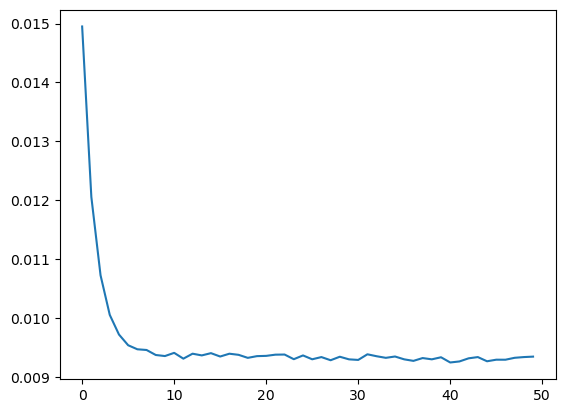

In [72]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [73]:
last_train_batch = scaled_train[-6:]

In [74]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [75]:
model.predict(last_train_batch)

1/1 [==============================] - 1s 905ms/step


array([[0.34264076]], dtype=float32)

In [76]:
scaled_test[0]

array([0.25252525])

### Testing Model

In [77]:
test_predictions = []
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    # Mendapatkan nilai prediksi untuk batch pertama.
    current_pred = model.predict(current_batch)[0]

    # Menambahkan nilai prediksi ke dalam array.
    test_predictions.append(current_pred)
  
    # Menggunakan hasil prediksi untuk mengupdate batch dan menghapus nilai pertama.
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]],axis=1)

true_predictions = scaler.inverse_transform(test_predictions)

1/1 [==============================] - 0s 39ms/step


In [78]:
test_predictions

[array([0.34264076], dtype=float32),
 array([0.34961095], dtype=float32),
 array([0.35467815], dtype=float32),
 array([0.3561163], dtype=float32),
 array([0.35704046], dtype=float32),
 array([0.35085273], dtype=float32),
 array([0.35767007], dtype=float32),
 array([0.35934582], dtype=float32),
 array([0.36078566], dtype=float32),
 array([0.36208147], dtype=float32),
 array([0.3633069], dtype=float32),
 array([0.36447933], dtype=float32),
 array([0.3658896], dtype=float32),
 array([0.36702916], dtype=float32),
 array([0.36809823], dtype=float32),
 array([0.36910295], dtype=float32),
 array([0.37004077], dtype=float32),
 array([0.3709244], dtype=float32),
 array([0.37175652], dtype=float32),
 array([0.37252334], dtype=float32),
 array([0.37323803], dtype=float32),
 array([0.37390122], dtype=float32),
 array([0.3745189], dtype=float32),
 array([0.37509418], dtype=float32),
 array([0.3756296], dtype=float32),
 array([0.37612757], dtype=float32),
 array([0.3765909], dtype=float32),
 array([

In [79]:
true_predictions = scaler.inverse_transform(test_predictions)

In [80]:
true_predictions

array([[33.921435  ],
       [34.6114845 ],
       [35.11313725],
       [35.25551319],
       [35.34700602],
       [34.73442006],
       [35.40933681],
       [35.57523653],
       [35.71778065],
       [35.84606534],
       [35.96738407],
       [36.08345398],
       [36.22307128],
       [36.33588687],
       [36.44172469],
       [36.54119253],
       [36.63403666],
       [36.72151691],
       [36.80389586],
       [36.87981042],
       [36.95056468],
       [37.0162206 ],
       [37.07737121],
       [37.13432336],
       [37.18733078],
       [37.23662952],
       [37.28249985],
       [37.32517487],
       [37.3648729 ],
       [37.40180048],
       [37.43616119],
       [37.4681114 ],
       [37.49784288],
       [37.52549431],
       [37.5512073 ],
       [37.57512054],
       [37.59736973],
       [37.6180611 ],
       [37.63730675],
       [37.65520996],
       [37.67185628],
       [37.68734014],
       [37.70175299],
       [37.71514499],
       [37.72760761],
       [37

In [81]:
test['LSTM'] = true_predictions

In [82]:
test

,CO,y,ELM,LSTM
Date,,,,
2020-01-01,25.0,39.0,27.262735,33.921435
2020-01-02,39.0,27.0,39.325199,34.611484
2020-01-03,27.0,19.0,29.279674,35.113137
2020-01-04,19.0,25.0,21.497192,35.255513
2020-01-05,25.0,39.0,27.262735,35.347006
...,...,...,...,...
2020-08-26,9.0,10.0,13.394550,37.891377
2020-08-27,10.0,15.0,14.733997,37.891377
2020-08-28,15.0,12.0,18.537766,37.891377


<AxesSubplot:xlabel='Date'>

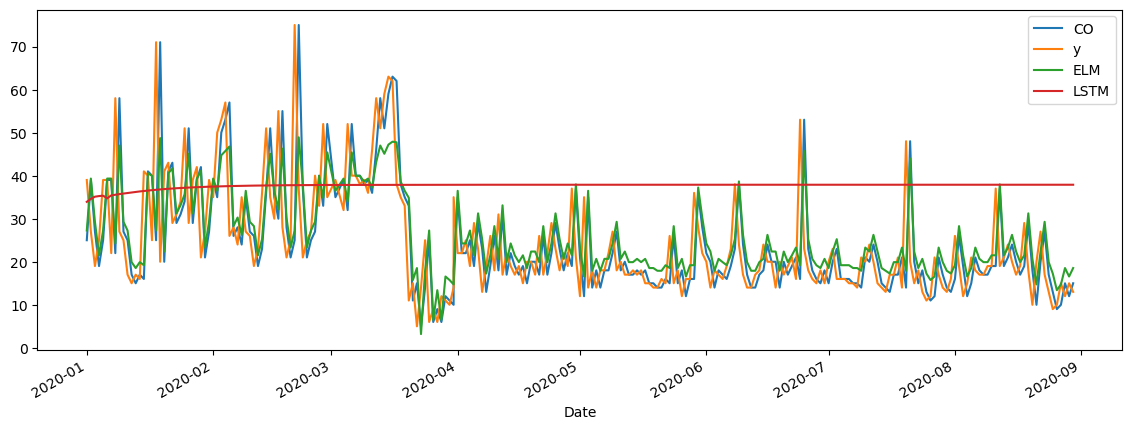

In [83]:
test.plot(figsize=(14,5))

In [84]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

LSTM_MAE = mean_absolute_error(test['CO'], test['LSTM'])
print('LSTM MSE = ', LSTM_MAE)

LSTM_RMSE = sqrt(mean_squared_error(test['CO'],test['LSTM']))
print('LSTM RMSE = ', LSTM_RMSE)

LSTM MSE =  16.545473265992708
LSTM RMSE =  18.245856944916888


## GRU

In [85]:
# model2 = Sequential()
# model2.add(GRU(64, activation='relu', input_shape=(n_input, n_features)))
# model2.add(Dense(1))
# model2.compile(optimizer='SGD', loss='mse')

model2 = Sequential()
model2.add(GRU(128, activation='relu', input_shape=(n_input, n_features)))
model2.add(Dense(1))
model2.compile(optimizer='SGD', loss='mse')

In [86]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               66560     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


### Training Model

In [87]:
model2.fit(generator,epochs=50)

Epoch 1/50
1435/1435 [==============================] - 13s 7ms/step - loss: 0.0153
Epoch 2/50
1435/1435 [==============================] - 9s 6ms/step - loss: 0.0116
Epoch 3/50
1435/1435 [==============================] - 10s 7ms/step - loss: 0.0103
Epoch 4/50
1435/1435 [==============================] - 10s 7ms/step - loss: 0.0098
Epoch 5/50
1435/1435 [==============================] - 11s 7ms/step - loss: 0.0096
Epoch 6/50
1435/1435 [==============================] - 10s 7ms/step - loss: 0.0095
Epoch 7/50
1435/1435 [==============================] - 9s 7ms/step - loss: 0.0094
Epoch 8/50
1435/1435 [==============================] - 11s 8ms/step - loss: 0.0094
Epoch 9/50
1435/1435 [==============================] - 9s 6ms/step - loss: 0.0094
Epoch 10/50
1435/1435 [==============================] - 9s 6ms/step - loss: 0.0094
Epoch 11/50
1435/1435 [==============================] - 10s 7ms/step - loss: 0.0094
Epoch 12/50
1435/1435 [==============================] - 9s 7ms/step - loss: 0

### Testing Model

In [88]:
test_predictions = []
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    # Mendapatkan nilai prediksi untuk batch pertama.
    current_pred = model.predict(current_batch)[0]

    # Menambahkan nilai prediksi ke dalam array.
    test_predictions.append(current_pred)
  
    # Menggunakan hasil prediksi untuk mengupdate batch dan menghapus nilai pertama.
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]],axis=1)

true_predictions = scaler.inverse_transform(test_predictions)

1/1 [==============================] - 0s 38ms/step


In [89]:
test['GRU'] = true_predictions

In [90]:
test

,CO,y,ELM,LSTM,GRU
Date,,,,,
2020-01-01,25.0,39.0,27.262735,33.921435,33.921435
2020-01-02,39.0,27.0,39.325199,34.611484,34.611484
2020-01-03,27.0,19.0,29.279674,35.113137,35.113137
2020-01-04,19.0,25.0,21.497192,35.255513,35.255513
2020-01-05,25.0,39.0,27.262735,35.347006,35.347006
...,...,...,...,...,...
2020-08-26,9.0,10.0,13.394550,37.891377,37.891377
2020-08-27,10.0,15.0,14.733997,37.891377,37.891377
2020-08-28,15.0,12.0,18.537766,37.891377,37.891377


<AxesSubplot:xlabel='Date'>

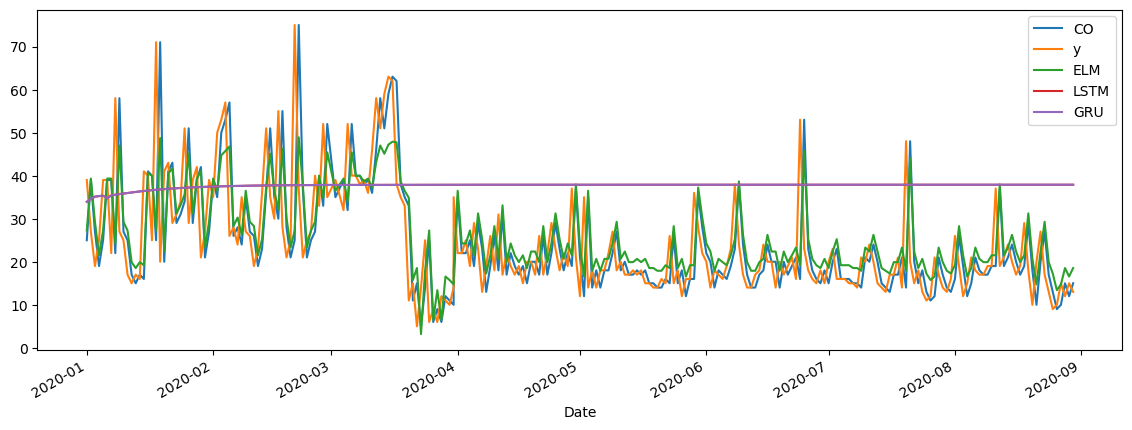

In [91]:
test.plot(figsize=(14,5))

In [92]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

GRU_MAE = mean_absolute_error(test['CO'], test['GRU'])
print('GRU MAE = ', GRU_MAE)

GRU_RMSE = sqrt(mean_squared_error(test['CO'],test['GRU']))
print('GRU RMSE = ', GRU_RMSE)

GRU MAE =  16.545473265992708
GRU RMSE =  18.245856944916888


## Extreme Learning Machine (ELM)

In [93]:
from sklearn.linear_model import Ridge as skRidge
from pyrcn.echo_state_network import ESNRegressor
from pyrcn.extreme_learning_machine import ELMRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [94]:
data = df

In [95]:
data.head()

,CO,y
Date,,
2016-01-01,53.0,29.0
2016-01-02,29.0,33.0
2016-01-03,33.0,36.0
2016-01-04,36.0,54.0
2016-01-05,54.0,43.0


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1684 entries, 2016-01-01 to 2020-08-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CO      1684 non-null   float64
 1   y       1683 non-null   float64
dtypes: float64(2)
memory usage: 39.5 KB


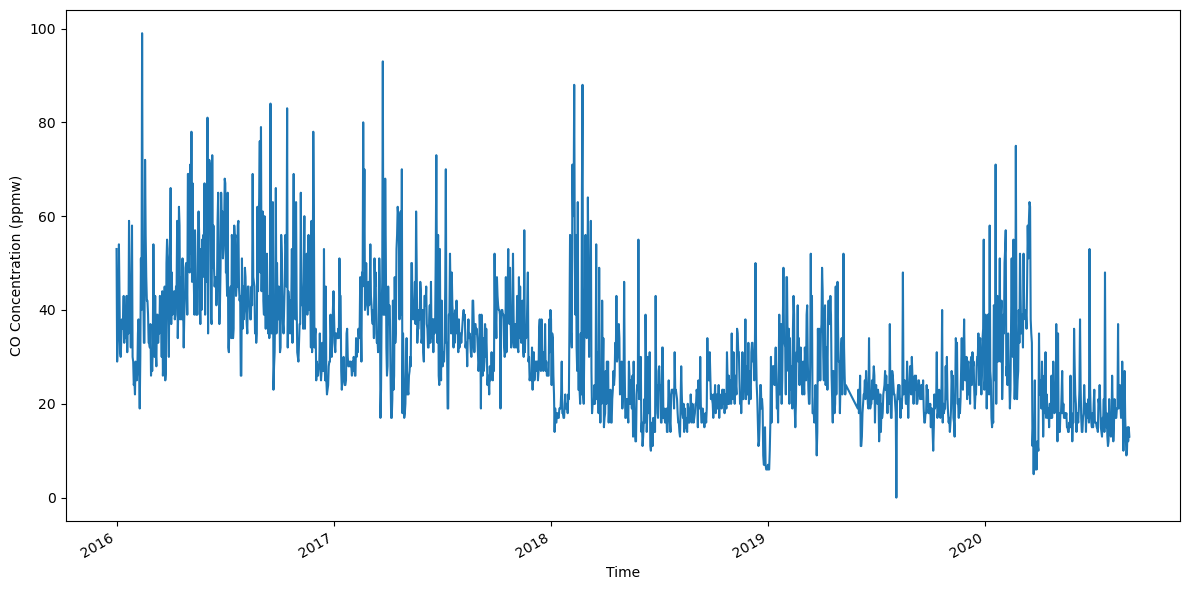

In [97]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(data['CO'])
ax.set_xlabel('Time')
ax.set_ylabel('CO Concentration (ppmw)')
fig.autofmt_xdate()
plt.tight_layout()

In [98]:
data.isna().sum()

CO    0
y     1
dtype: int64

In [99]:
# Menghandle missing value.
# data = data.interpolate()

In [100]:
df = data.copy()
df['y'] = df['CO'].shift(-1)

In [101]:
df

,CO,y
Date,,
2016-01-01,53.0,29.0
2016-01-02,29.0,33.0
2016-01-03,33.0,36.0
2016-01-04,36.0,54.0
2016-01-05,54.0,43.0
...,...,...
2020-08-27,10.0,15.0
2020-08-28,15.0,12.0
2020-08-29,12.0,15.0


In [102]:
train = df[:1441]
test = df[1441:]
# Menghapus baris terakhir
test = test.drop(test.tail(1).index)

In [103]:
train

,CO,y
Date,,
2016-01-01,53.0,29.0
2016-01-02,29.0,33.0
2016-01-03,33.0,36.0
2016-01-04,36.0,54.0
2016-01-05,54.0,43.0
...,...,...
2019-12-27,26.0,34.0
2019-12-28,34.0,36.0
2019-12-29,36.0,55.0


In [104]:
test

,CO,y
Date,,
2020-01-01,25.0,39.0
2020-01-02,39.0,27.0
2020-01-03,27.0,19.0
2020-01-04,19.0,25.0
2020-01-05,25.0,39.0
...,...,...
2020-08-26,9.0,10.0
2020-08-27,10.0,15.0
2020-08-28,15.0,12.0


In [105]:
X_train = train['CO'].to_numpy()
X_train

array([53., 29., 33., ..., 36., 55., 23.])

In [106]:
y_train = train['y'].to_numpy()
y_train

array([29., 33., 36., ..., 55., 23., 25.])

In [107]:
X_test = test['CO'].to_numpy()
X_test

array([25., 39., 27., 19., 25., 39., 39., 22., 58., 27., 25., 17., 15.,
       17., 16., 41., 40., 25., 71., 20., 41., 43., 29., 31., 34., 51.,
       29., 39., 42., 21., 27., 39., 35., 50., 53., 57., 26., 28., 24.,
       35., 27., 26., 19., 23., 36., 51., 35., 30., 55., 28., 21., 25.,
       75., 37., 21., 25., 27., 40., 33., 52., 35., 39., 32., 52., 40.,
       40., 38., 39., 36., 46., 58., 51., 59., 63., 62., 38., 35., 33.,
       11., 15.,  5., 14., 25.,  6.,  9.,  6., 12., 11., 10., 14., 35.,
       22., 22., 25., 19., 29., 23., 13., 19., 26., 18., 31., 17., 22.,
       19., 17., 19., 15., 20., 20., 17., 26., 17., 22., 29., 23., 18.,
       22., 19., 37., 21., 12., 35., 14., 18., 14., 18., 18., 22., 27.,
       18., 20., 17., 17., 18., 17., 18., 15., 15., 14., 14., 16., 15.,
       26., 15., 18., 12., 16., 16., 36., 28., 22., 20., 14., 18., 17.,
       16., 19., 23., 38., 24., 17., 14., 14., 17., 18., 24., 20., 20.,
       14., 20., 17., 19., 21., 16., 53., 23., 18., 16., 15., 18

In [108]:
elm = ELMRegressor( regressor = skRidge()).fit(X = X_train.reshape(-1,1), y = y_train)

In [109]:
y_elm = elm.predict(X_test.reshape(-1,1))

In [110]:
test['ELM'] = y_elm

In [111]:
test

,CO,y,ELM
Date,,,
2020-01-01,25.0,39.0,27.262735
2020-01-02,39.0,27.0,39.325199
2020-01-03,27.0,19.0,29.279674
2020-01-04,19.0,25.0,21.497192
2020-01-05,25.0,39.0,27.262735
...,...,...,...
2020-08-26,9.0,10.0,13.394550
2020-08-27,10.0,15.0,14.733997
2020-08-28,15.0,12.0,18.537766


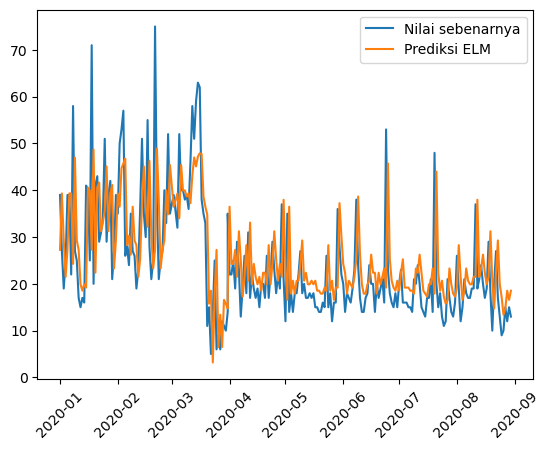

In [112]:
plt.plot(test['y'])
plt.plot(test['ELM'])
plt.xticks(rotation = 45)
plt.legend(['Nilai sebenarnya', 'Prediksi ELM'])

In [113]:
RMSE = sqrt(mean_squared_error(test['y'], test['ELM']))
MAE = mean_absolute_error(test['y'], test['ELM'])

In [68]:
print('Extreme Learning Machine (ELM)')
print('------------------------------')
print('MAE = ', MAE)
print('RMSE = ', RMSE)

print()

print('Long Short Term Memory (LSTM - 64)')
print('-----------------------------')
print('MAE = ', LSTM_MAE)
print('RMSE = ', LSTM_RMSE)

print()

print('Gated Recurrent Unit (GRU - 64)')
print('--------------------------')
print('MAE = ', GRU_MAE)
print('RMSE = ', GRU_RMSE)

Extreme Learning Machine (ELM)
------------------------------
MAE =  7.690751248550094
RMSE =  10.632131346576447

Long Short Term Memory (LSTM - 64)
-----------------------------
MAE =  8.3127438806212
RMSE =  12.736437447822382

Gated Recurrent Unit (GRU - 64)
--------------------------
MAE =  8.3127438806212
RMSE =  12.736437447822382


In [114]:
print('Extreme Learning Machine (ELM)')
print('------------------------------')
print('MAE = ', MAE)
print('RMSE = ', RMSE)

print()

print('Long Short Term Memory (LSTM - 128)')
print('-----------------------------')
print('MAE = ', LSTM_MAE)
print('RMSE = ', LSTM_RMSE)

print()

print('Gated Recurrent Unit (GRU - 128)')
print('--------------------------')
print('MAE = ', GRU_MAE)
print('RMSE = ', GRU_RMSE)

Extreme Learning Machine (ELM)
------------------------------
MAE =  7.690751248550094
RMSE =  10.632131346576447

Long Short Term Memory (LSTM - 128)
-----------------------------
MAE =  16.545473265992708
RMSE =  18.245856944916888

Gated Recurrent Unit (GRU - 128)
--------------------------
MAE =  16.545473265992708
RMSE =  18.245856944916888
